In [12]:
import os
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

In [55]:
mesh_9_file = '/glade/work/afoster/ABoVE/field_sites/sparse_grid_nwtpts_mesh.nc'
mesh_400_file = '/glade/work/afoster/FATES_calibration/mesh_files/lnd_mesh.nc'

mesh_9 = xr.open_dataset(mesh_9_file)
mesh_9 = mesh_9.where(mesh_9.elementMask == 1, drop=True)

mesh_400 = xr.open_dataset(mesh_400_file)
mesh_400 = mesh_400.where(mesh_400.elementMask == 1, drop=True)

In [16]:
centerCoords_400 = mesh_400.centerCoords.values
centerCoords_9 = mesh_9.centerCoords.values

In [58]:
centerCoords_9

array([[241.25      ,  60.78534031],
       [242.5       ,  60.78534031],
       [245.        ,  60.78534031],
       [246.25      ,  60.78534031],
       [242.5       ,  61.72774869],
       [243.75      ,  61.72774869],
       [243.75      ,  62.67015707],
       [246.25      ,  62.67015707],
       [247.5       ,  62.67015707]])

In [27]:
surdat = xr.open_dataset('/glade/work/afoster/ABoVE/field_sites/surf_data_updated5.nc')
surdat["lat"] = xr.DataArray(np.unique(surdat.LATIXY.values), dims="lsmlat")
surdat["lon"] = xr.DataArray(np.unique(surdat.LONGXY.values), dims="lsmlon")
surdat = surdat.swap_dims({'lsmlat': 'lat', 'lsmlon': 'lon'})

In [30]:
lons_400 = [c[0] for c in centerCoords_400]
lats_400 = [c[1] for c in centerCoords_400]

lons_9 = [c[0] for c in centerCoords_9]
lats_9 = [c[1] for c in centerCoords_9]

In [37]:
lats_9

[60.7853403141361,
 60.7853403141361,
 60.7853403141361,
 60.7853403141361,
 61.7277486910994,
 61.7277486910994,
 62.6701570680628,
 62.6701570680628,
 62.6701570680628]

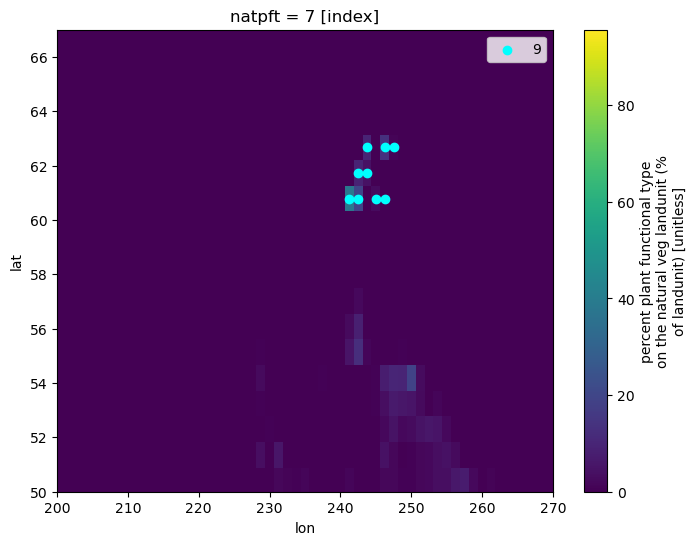

In [51]:
fig, ax = plt.subplots(figsize=(8, 6))
surdat.PCT_NAT_PFT.isel(natpft=7).plot(ax=ax)
#ax.scatter(lons_400, lats_400, color='red', marker='o', label='400')
ax.scatter(lons_9, lats_9, color='cyan', marker='o', label='9')
ax.set_xlim([200, 270])
ax.set_ylim([50, 67])

# Optional: add a legend
ax.legend()

In [59]:
#ds = xr.open_dataset('/glade/derecho/scratch/afoster/ABoVE_NO-COMP_test_no_datm_restart/run/ABoVE_NO-COMP_test_no_datm_restart.cpl.r.0006-01-01-00000.nc')

In [92]:
dsh = xr.open_dataset('/glade/derecho/scratch/afoster/ABoVE_NO-COMP_test_no_datm_restart/run/ABoVE_NO-COMP_test_no_datm_restart.clm2.r.0006-01-01-00000.nc')

/glade/work/afoster/conda-envs/fates_calibration/lib/python3.11/site-packages/xarray/conventions.py:436: SerializationWarning: variable 'timemgr_rst_nstep_rad_prev' has multiple fill values {-9999, -999999999}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/glade/work/afoster/conda-envs/fates_calibration/lib/python3.11/site-packages/xarray/conventions.py:436: SerializationWarning: variable 'timemgr_rst_type' has multiple fill values {-9999, -999999999}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/glade/work/afoster/conda-envs/fates_calibration/lib/python3.11/site-packages/xarray/conventions.py:436: SerializationWarning: variable 'timemgr_rst_step_sec' has multiple fill values {-9999, -999999999}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/glade/work/afoster/conda-envs/fates_calibration/lib/python3.11/site-packages/xarray/conventions.py:436: SerializationWarning: variable 'timemgr_rst_start_ymd' has multiple fill values {-9999

In [93]:
dsh.data_vars

Data variables:
    timemgr_rst_nstep_rad_prev        float64 ...
    timemgr_rst_type                  float64 ...
    timemgr_rst_step_sec              float64 ...
    timemgr_rst_start_ymd             float64 ...
    timemgr_rst_start_tod             float64 ...
    timemgr_rst_ref_ymd               float64 ...
    timemgr_rst_ref_tod               float64 ...
    timemgr_rst_curr_ymd              float64 ...
    timemgr_rst_curr_tod              float64 ...
    grid1d_lon                        (gridcell) float64 ...
    grid1d_lat                        (gridcell) float64 ...
    grid1d_ixy                        (gridcell) float64 ...
    grid1d_jxy                        (gridcell) float64 ...
    land1d_lon                        (landunit) float64 ...
    land1d_lat                        (landunit) float64 ...
    land1d_ixy                        (landunit) float64 ...
    land1d_jxy                        (landunit) float64 ...
    land1d_gridcell_index             (landuni

In [95]:
#(dsh.T_VEG - 273.15).plot()
dsh.T_VEG

<xarray.DataArray 'T_VEG' (pft: 207)>
array([243.076762, 240.402665, 240.341103, ..., 283.      , 283.      ,
       238.183593])
Dimensions without coordinates: pft
Attributes:
    long_name:                 vegetation temperature
    units:                     K
    interpinic_flag:           1
    interpinic_flag_meanings:  1=nearest neighbor, 2=copy directly, 3=skip, 4...
    varnames_on_old_files:     T_VEG

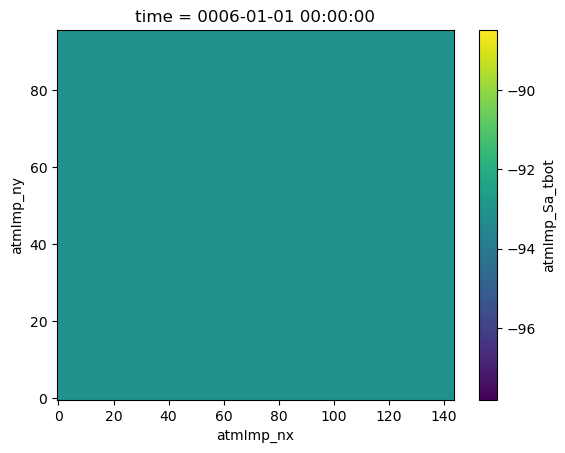

In [74]:
(ds.atmImp_Sa_tbot - 273.15).plot()

In [79]:
ds2 = xr.open_dataset('/glade/derecho/scratch/afoster/ctsm60SP_fates_sparse_vai_default/run/ctsm60SP_fates_sparse_vai_default.clm2.h0.0056-02-01-00000.nc')

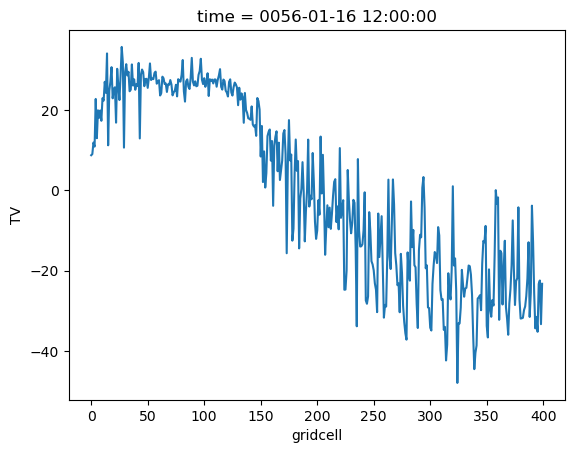

In [91]:
(ds2.TV - 273.15).isel(time=0).plot()